# imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import classification_report,plot_precision_recall_curve,plot_roc_curve,plot_confusion_matrix,confusion_matrix,accuracy_score,roc_curve
from sklearn.pipeline import Pipeline

In [3]:
# Organizing Data

In [4]:
# global Variables
random_state = 3 # random_state variable is chosen to be 3 for all algorithms to ensure fair comparison

In [5]:
df = pd.read_csv('data.csv',index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


<AxesSubplot:xlabel='result', ylabel='count'>

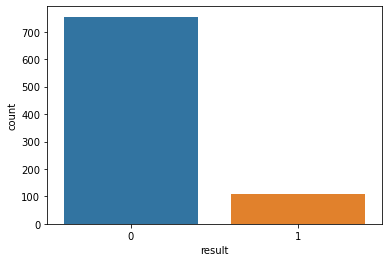

In [6]:
sns.countplot(x='result',data=df)

In [7]:
#splitting the data into features and labels
X = df.drop(['result'],axis=1)
y = df['result']

# spliting the date 0.9 for cross validation (simply train & test) and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

In [8]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
#Logistic model
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [10]:
log_model.C_

array([21.5443469])

In [11]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [12]:
log_model.coef_

array([[ 0.83255095, -1.20221132,  0.84419192,  3.51497147, -1.06374047,
         0.43506727, -0.17079002,  0.34985988, -0.2473681 , -0.14743581,
         0.06998524,  0.00490717,  0.64921582]])

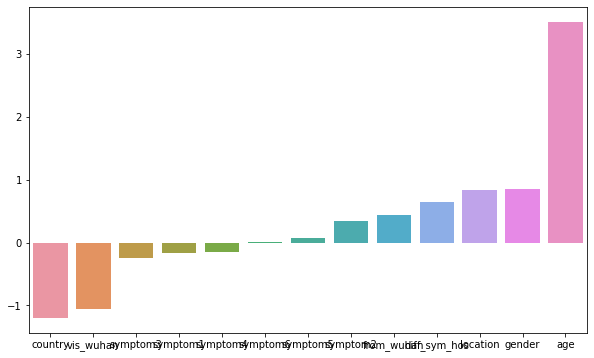

In [13]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [14]:
y_pred = log_model.predict(scaled_X_test)

In [15]:
confusion_matrix(y_test,y_pred)

array([[77,  2],
       [ 3,  5]], dtype=int64)

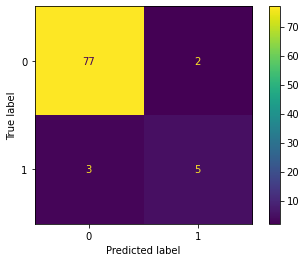

In [16]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.71      0.62      0.67         8

    accuracy                           0.94        87
   macro avg       0.84      0.80      0.82        87
weighted avg       0.94      0.94      0.94        87



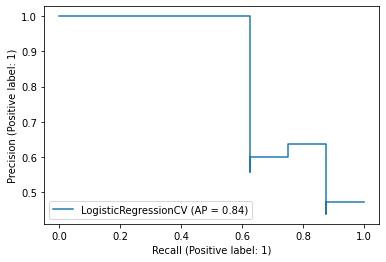

In [18]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

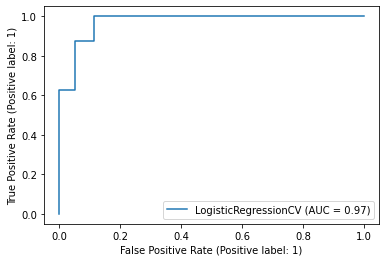

In [19]:
plot_roc_curve(log_model,scaled_X_test,y_test)